In [23]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

In [24]:
rb_df = pd.read_csv('Combined_RB.csv') #Reading in Combined Positional data
metric = 'weighted_avg_breakaway_yards' #Using Average Breakaway Yards to Predict

In [25]:
print(rb_df.columns)

Index(['Unnamed: 0', 'Unnamed: 0_x', 'Team', 'Year', 'Position',
       'Value_cap_space', 'Value_draft_data', 'Previous_AV', 'Current_AV',
       'Previous_PFF', 'Current_PFF_x', 'Total DVOA', 'win-loss-pct',
       'Net EPA', 'Unnamed: 0_y', 'weighted_avg_attempts',
       'weighted_avg_avoided_tackles', 'weighted_avg_breakaway_attempts',
       'weighted_avg_breakaway_percent', 'weighted_avg_breakaway_yards',
       'weighted_avg_declined_penalties', 'weighted_avg_designed_yards',
       'weighted_avg_drops', 'weighted_avg_elu_recv_mtf',
       'weighted_avg_elu_rush_mtf', 'weighted_avg_elu_yco',
       'weighted_avg_elusive_rating', 'weighted_avg_explosive',
       'weighted_avg_first_downs', 'weighted_avg_franchise_id',
       'weighted_avg_fumbles', 'weighted_avg_gap_attempts',
       'weighted_avg_grades_hands_fumble', 'Current_PFF_y',
       'weighted_avg_grades_offense_penalty', 'weighted_avg_grades_pass',
       'weighted_avg_grades_pass_block', 'weighted_avg_grades_pass_rout

In [26]:
drop_col = ['Unnamed: 0']
rb_df = rb_df.drop(columns=drop_col)

In [27]:
rb_df.head(20)

,Unnamed: 0_x,Team,Year,Position,Value_cap_space,Value_draft_data,Previous_AV,Current_AV,Previous_PFF,Current_PFF_x,...,Previous_scrambles,Previous_targets,Previous_total_touches,Previous_touchdowns,Previous_yards,Previous_yards_after_contact,Previous_yco_attempt,Previous_ypa,Previous_yprr,Previous_zone_attempts
0,32,Buccaneers,2019,HB,2.247609,126.419891,7.0,13.0,64.767308,65.581604,...,0.000,26.939189,211.226351,4.141892,704.385135,507.327703,2.547365,3.526689,0.467399,103.229730
1,33,Packers,2019,HB,1.163656,31.352719,10.0,18.0,72.643895,81.600456,...,0.000,31.600000,144.843636,5.418182,564.112727,334.698182,2.771527,4.706182,0.891600,77.625455
2,34,Giants,2019,HB,4.404888,578.472330,17.0,12.0,80.499291,69.028045,...,0.000,96.933962,299.443396,9.188679,1101.273585,734.207547,3.138302,4.717925,1.441792,149.160377
3,35,Commanders,2019,HB,3.475027,102.500497,11.0,13.0,71.444032,67.490256,...,0.000,27.679612,232.226537,5.686084,872.203883,628.378641,2.902330,4.140777,1.269871,91.779935
4,36,Patriots,2019,HB,6.556854,202.527583,20.0,17.0,71.641226,70.494015,...,0.000,39.258242,181.936813,4.736264,673.711538,376.887363,2.363022,4.331868,1.284038,49.873626
5,37,Vikings,2019,HB,1.987248,160.892394,12.0,25.0,72.750276,76.719881,...,0.000,33.941980,156.709898,3.774744,557.928328,377.389078,2.936212,4.315700,0.914369,82.836177
6,38,Broncos,2019,HB,1.222104,63.971498,14.0,14.0,73.200903,69.022851,...,0.000,35.252809,181.887640,6.775281,767.011236,406.938202,2.757472,4.888764,1.040393,75.359551
7,39,Falcons,2019,HB,4.622742,44.313414,13.0,13.0,65.960274,59.997733,...,0.000,31.726667,148.433333,3.426667,554.223333,349.920000,2.785300,4.561333,0.847900,85.510000
8,40,Bengals,2019,HB,3.900106,133.421060,16.0,11.0,74.236504,70.374495,...,0.000,49.470588,232.699346,6.718954,943.294118,530.209150,2.680392,4.661438,1.070850,127.313725
9,41,Colts,2019,HB,1.514346,45.016446,16.0,18.0,68.290828,70.317484,...,0.000,35.177650,167.667622,5.687679,641.498567,388.372493,2.716791,4.544413,0.784097,52.326648


In [28]:
team_data = rb_df.groupby('Team')
print(rb_df.head(32)) #check all the teams are have their rb values grouped

    Unnamed: 0_x        Team  Year Position  Value_cap_space  \
0             32  Buccaneers  2019       HB         2.247609   
1             33     Packers  2019       HB         1.163656   
2             34      Giants  2019       HB         4.404888   
3             35  Commanders  2019       HB         3.475027   
4             36    Patriots  2019       HB         6.556854   
5             37     Vikings  2019       HB         1.987248   
6             38     Broncos  2019       HB         1.222104   
7             39     Falcons  2019       HB         4.622742   
8             40     Bengals  2019       HB         3.900106   
9             41       Colts  2019       HB         1.514346   
10            42    Steelers  2019       HB         1.493092   
11            43     Jaguars  2019       HB         4.505845   
12            44       Bears  2019       HB         0.951116   
13            45    Seahawks  2019       HB         0.329437   
14            46    Panthers  2019      

In [29]:
sequences = []
targets = []

#Iterating over team and their data
for team, group in team_data:
    if len(group) >= 4:
        print(f"Processing team: {team}, data length(years): {len(group)}")
        
        #Iterate through data to make sequences for every 3 years
        for i in range(len(group) - 3):
            sequence = group.iloc[i:i+3][['Value_cap_space', 'Previous_PFF', 'weighted_avg_avoided_tackles', 'weighted_avg_breakaway_attempts','weighted_avg_breakaway_percent', 'weighted_avg_breakaway_yards']]
            #target the proceeding year's Current PFF to compare
            target = group.iloc[i+3]['weighted_avg_breakaway_yards']
            sequences.append(sequence.values) #Add sequence values to sequence list
            targets.append(target) #Add target values to target list
            
#Convert lists to numpy arrays
s = np.array(sequences)
t = np.array(targets)

print(f"Total sequences generated: {len(sequences)}")
print(f"X shape: {s.shape}, y shape: {t.shape}")

Processing team: 49ers, data length(years): 4
Processing team: Bears, data length(years): 4
Processing team: Bengals, data length(years): 4
Processing team: Bills, data length(years): 4
Processing team: Broncos, data length(years): 4
Processing team: Browns, data length(years): 4
Processing team: Buccaneers, data length(years): 4
Processing team: Cardinals, data length(years): 4
Processing team: Chargers, data length(years): 4
Processing team: Chiefs, data length(years): 4
Processing team: Colts, data length(years): 4
Processing team: Commanders, data length(years): 4
Processing team: Cowboys, data length(years): 4
Processing team: Dolphins, data length(years): 4
Processing team: Eagles, data length(years): 4
Processing team: Falcons, data length(years): 4
Processing team: Giants, data length(years): 4
Processing team: Jaguars, data length(years): 4
Processing team: Jets, data length(years): 4
Processing team: Lions, data length(years): 4
Processing team: Packers, data length(years): 4

In [30]:

# Reshape X to (samples, timesteps, features)
S = s.reshape(s.shape[0], 3, -1)  # 3 years per sequence, features will be inferred

print(S.shape)  # Should now be (samples, 3, features)
print(S)

(32, 3, 6)
[[[3.58129649e+00 6.69894484e+01 2.04386792e+01 9.78301887e+00
   3.76936321e+01 2.35856132e+02]
  [4.35923310e+00 7.27191268e+01 1.16226913e+01 5.20316623e+00
   2.73968338e+01 1.28382586e+02]
  [2.38356164e+00 7.11088300e+01 2.44914286e+01 5.46285714e+00
   1.96040000e+01 1.42154286e+02]]

 [[9.51115834e-01 6.92217484e+01 3.90129870e+01 4.13636364e+00
   1.36350649e+01 1.08448052e+02]
  [1.06962664e+00 6.44849515e+01 4.22694611e+01 4.53892216e+00
   1.98709581e+01 1.81500000e+02]
  [1.93972603e+00 7.79867612e+01 2.89539295e+01 5.49322493e+00
   1.93607046e+01 1.28070461e+02]]

 [[3.90010627e+00 7.42365039e+01 4.49546828e+01 1.22386707e+01
   2.82450151e+01 2.66610272e+02]
  [3.18365288e+00 7.03744949e+01 1.53313253e+01 2.36445783e+00
   1.72692771e+01 5.66566265e+01]
  [5.78630137e+00 6.66884615e+01 3.31715040e+01 9.68073879e+00
   2.13546174e+01 2.09569921e+02]]

 [[2.42295430e+00 6.35531707e+01 2.41982249e+01 9.73372781e+00
   3.00715976e+01 2.08834320e+02]
  [2.28557013

In [36]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the input layer
inputs = Input(shape=(3, 6))  # 3 time steps, 6 features because I had less features than 8

# Add a Dense layer before the attention to create more variability in the input
dense_input = Dense(16, activation='relu')(inputs)

# Add MultiHeadAttention layer
attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)

# Add Layer Normalization for stability
attention_output = LayerNormalization()(attention_output)

# Add RNN layer to capture temporal dependencies
rnn_output = SimpleRNN(units=50, activation='relu')(attention_output)

# Add Dropout to prevent overfitting
rnn_output = Dropout(0.2)(rnn_output)

# Output layer for predicting Current PFF
output = Dense(1)(rnn_output)

# Define the model
model = Model(inputs=inputs, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping callback to monitor validation loss
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

Epoch 1/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 2468.9209 - val_loss: 6726.8647
Epoch 2/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2532.0334 - val_loss: 5963.0010
Epoch 3/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2023.3396 - val_loss: 5966.4897
Epoch 4/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2102.9844 - val_loss: 6113.2739
Epoch 5/5
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2262.5066 - val_loss: 6943.0518


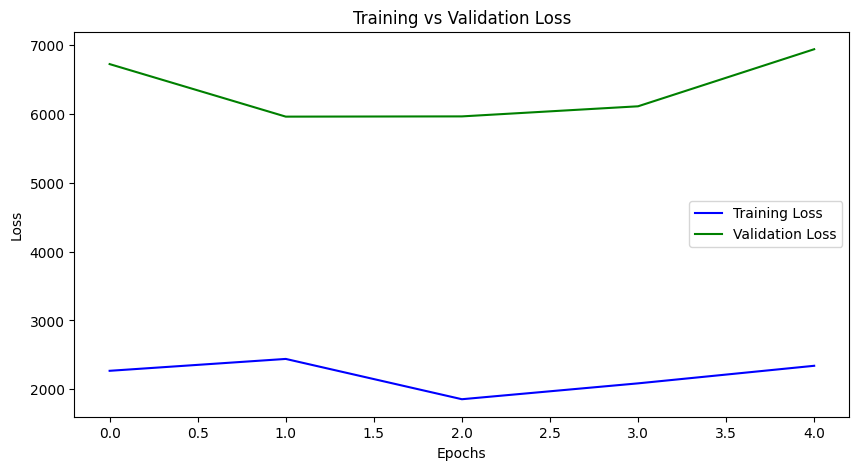

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R² Score: 0.6582


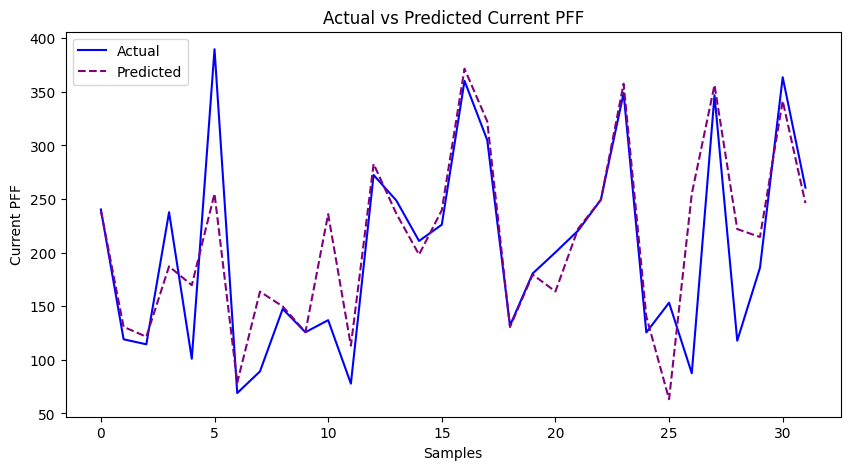

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2425.9780 - val_loss: 7124.4985
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1804.4104 - val_loss: 7178.9194
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2568.9893 - val_loss: 7258.3823
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2332.1279 - val_loss: 7398.0000
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1766.9465 - val_loss: 7001.5728
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2346.3325 - val_loss: 6814.6479
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2162.2817 - val_loss: 6731.3794
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2857.5347 - val_loss: 6597.0576
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2105.9517 - val_loss: 6480.1162
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3215.4885 - val_loss: 6862.3203


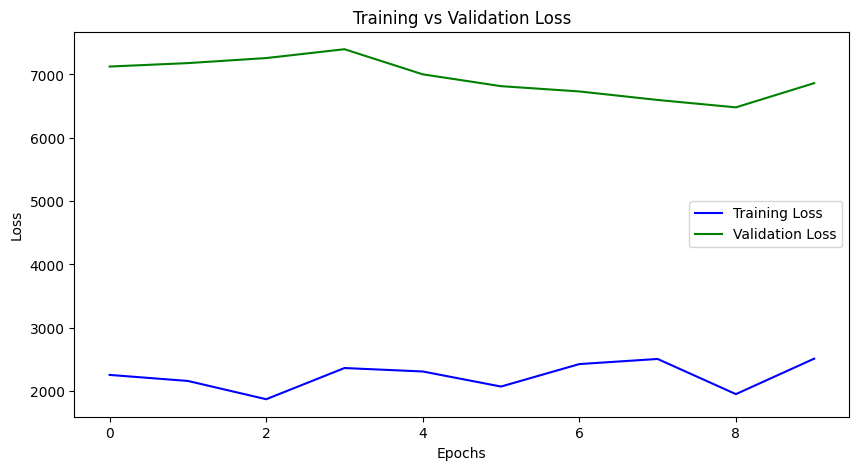

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R² Score: 0.6664


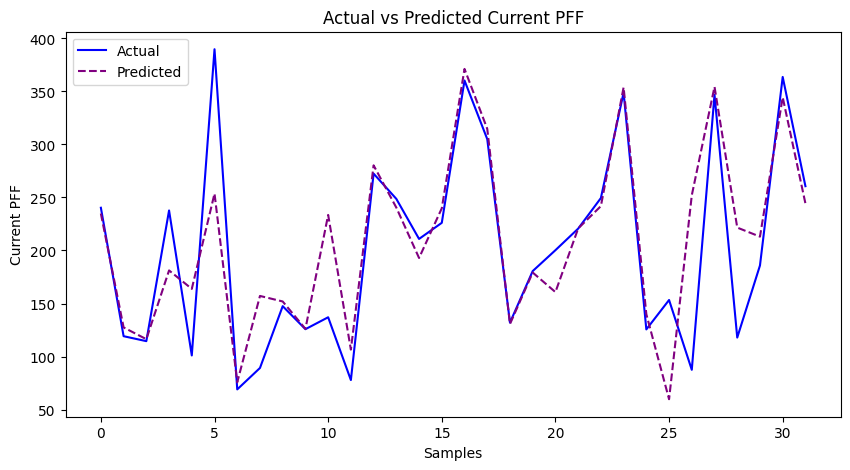

Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1846.3640 - val_loss: 6862.5830
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1851.6995 - val_loss: 6383.7275
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3216.5190 - val_loss: 6584.8442
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2143.2222 - val_loss: 6246.0234
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1609.1840 - val_loss: 5665.4854
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3501.9783 - val_loss: 5647.3843
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 3215.1392 - val_loss: 6199.3643
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2011.3000 - val_loss: 6364.4951
Epoch 9/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2253.5811 - val_loss: 6208.7827
Epoch 10/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3006.7485 - val_loss: 6455.3042
Epoch 11/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1618.3984 - val_loss: 6366.7549
Epoch 12/15
3/3 ━━━━━━━━━━━━

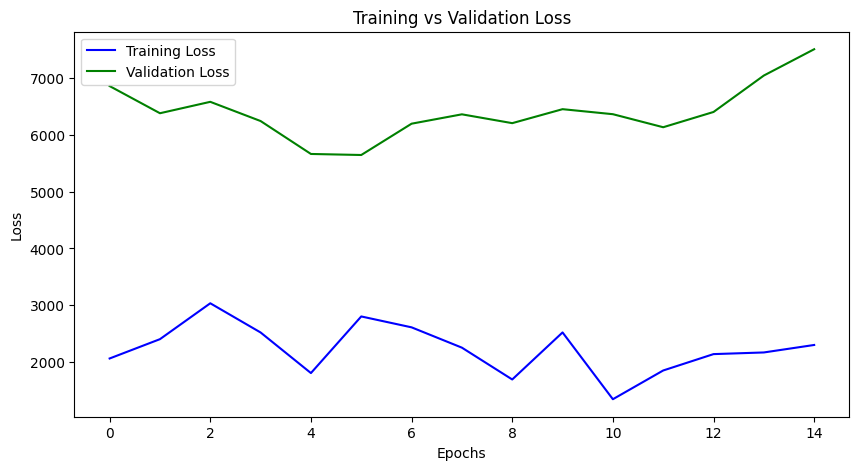

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
R² Score: 0.6561


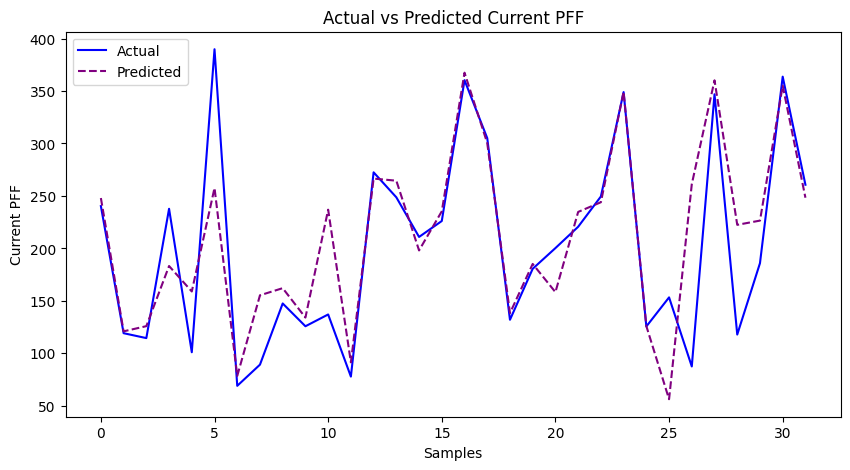

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2459.5742 - val_loss: 7560.3306
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2211.4526 - val_loss: 7127.0991
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2238.0920 - val_loss: 6671.7212
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1663.3181 - val_loss: 5897.6069
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2494.8547 - val_loss: 5848.9438
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1702.7013 - val_loss: 5960.6094
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2293.4243 - val_loss: 6316.9229
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2829.1152 - val_loss: 6952.4180
Epoch 9/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3415.4810 - val_loss: 7589.7041
Epoch 10/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3357.2178 - val_loss: 7417.8174
Epoch 11/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 2214.7554 - val_loss: 6801.9214
Epoch 12/20
3/3 ━━━━━━━━━━━━━

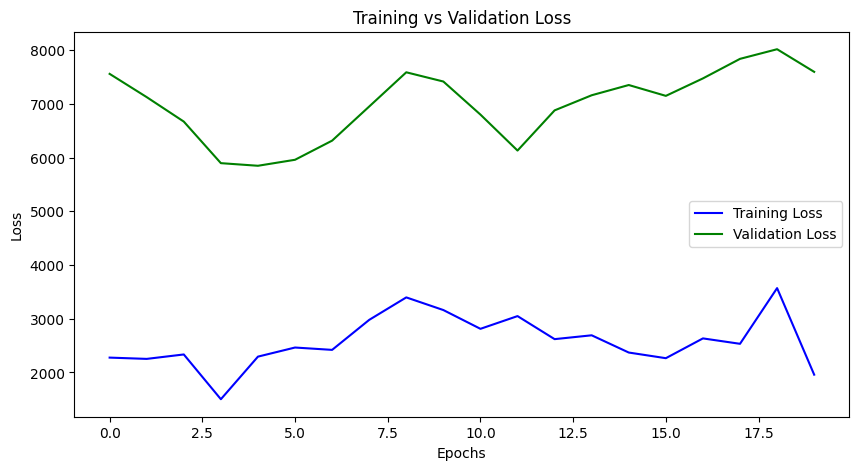

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R² Score: 0.6255


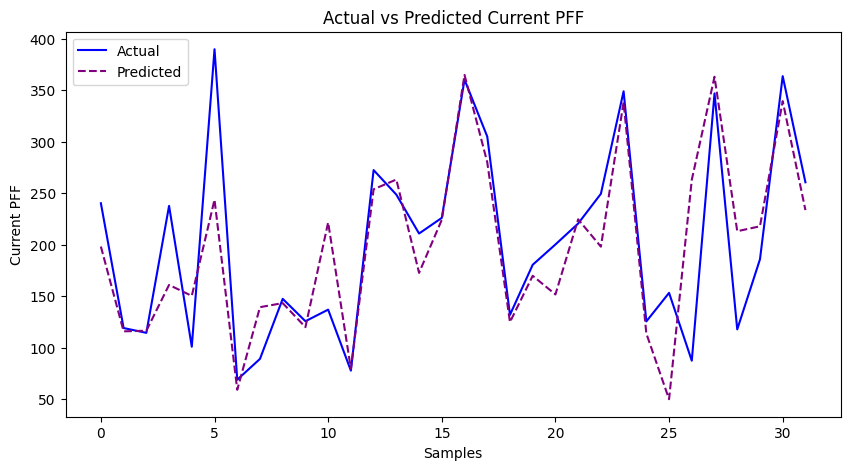

Epoch 1/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2070.4980 - val_loss: 6894.6162
Epoch 2/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2090.5872 - val_loss: 6700.2505
Epoch 3/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3072.3865 - val_loss: 6422.9155
Epoch 4/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3850.2087 - val_loss: 6864.4614
Epoch 5/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2197.2275 - val_loss: 7150.4673
Epoch 6/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2909.1182 - val_loss: 7308.1411
Epoch 7/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1884.1117 - val_loss: 7136.2852
Epoch 8/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1569.6090 - val_loss: 6325.8501
Epoch 9/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1370.9462 - val_loss: 6322.6646
Epoch 10/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1707.9127 - val_loss: 6638.3311
Epoch 11/25
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2552.3335 - val_loss: 6723.0610
Epoch 12/25
3/3 ━━━━━━━━━━━━━

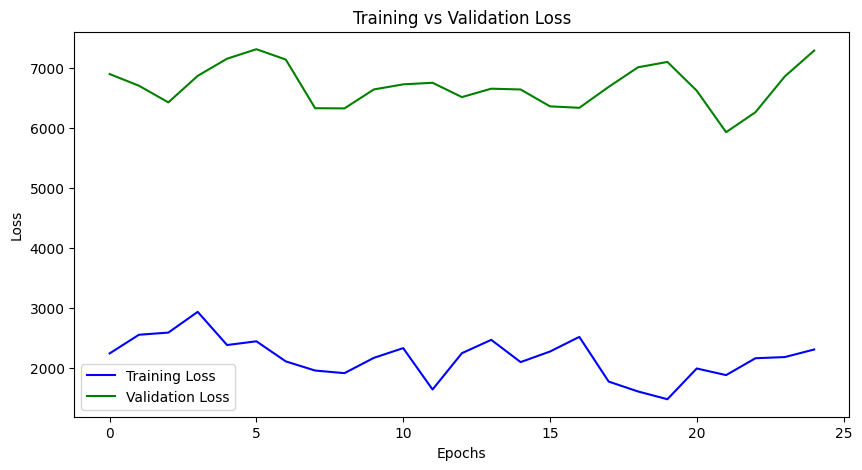

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R² Score: 0.6706


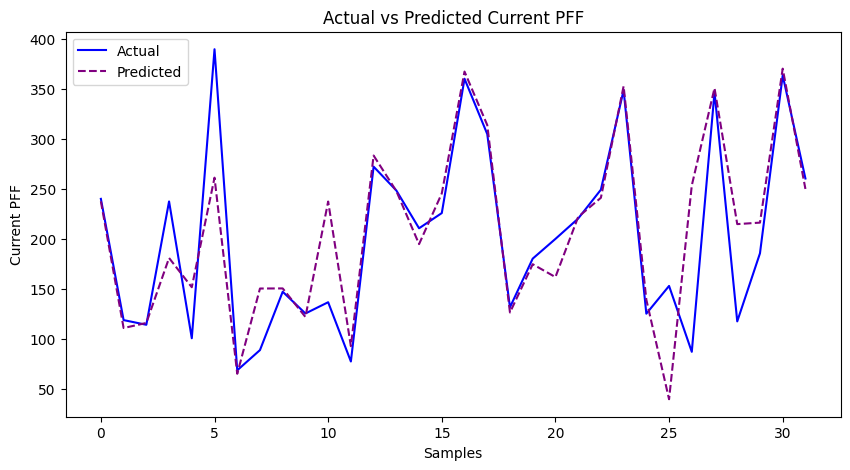

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2144.4058 - val_loss: 6951.2896
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1609.5350 - val_loss: 6168.8315
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1951.8433 - val_loss: 6179.6201
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2150.5132 - val_loss: 6691.4253
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1503.4263 - val_loss: 7033.9033
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2004.0087 - val_loss: 7105.9360
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1627.8804 - val_loss: 7295.7881
Epoch 8/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1942.3929 - val_loss: 7262.8916
Epoch 9/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2225.0627 - val_loss: 6826.8999
Epoch 10/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1861.1907 - val_loss: 6637.5322
Epoch 11/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2231.6372 - val_loss: 6642.7466
Epoch 12/30
3/3 ━━━━━━━━━━━━━

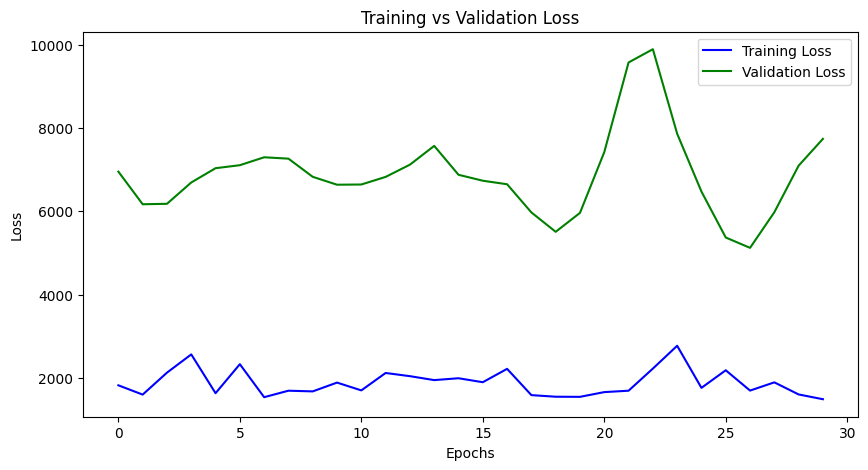

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
R² Score: 0.6652


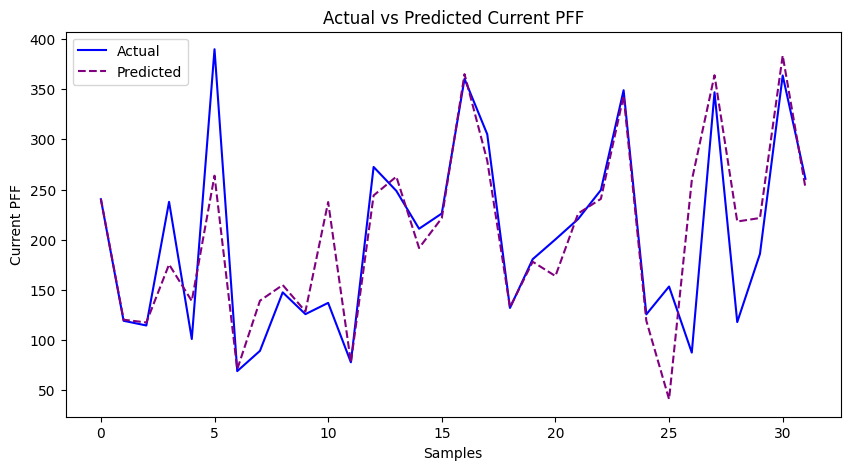

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2670.7385 - val_loss: 8406.1553
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1788.9391 - val_loss: 9013.2197
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2230.9707 - val_loss: 7762.1382
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2185.3916 - val_loss: 6878.6333
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1373.8899 - val_loss: 6565.8799
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1901.9492 - val_loss: 6585.3140
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2412.6738 - val_loss: 6675.4365
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2195.3501 - val_loss: 6948.0283
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1665.5249 - val_loss: 7385.4224
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1623.3579 - val_loss: 7342.0903
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1633.9390 - val_loss: 7408.4644
Epoch 12/50
3/3 ━━━━━━━━━━━━━

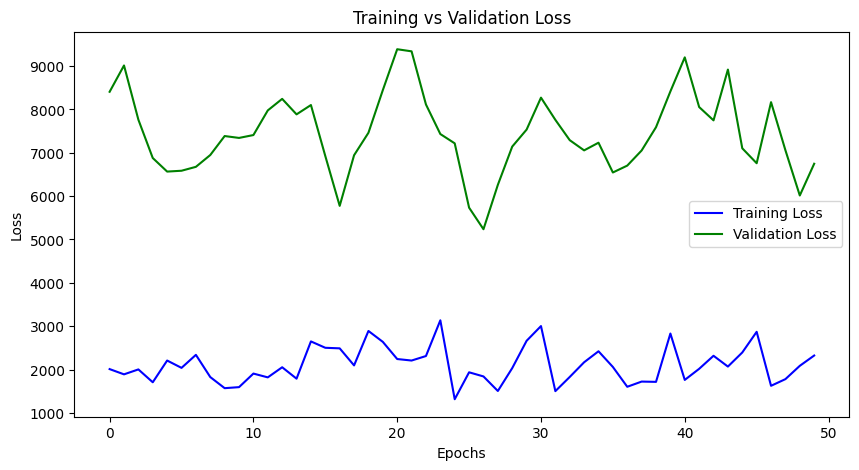

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
R² Score: 0.7002


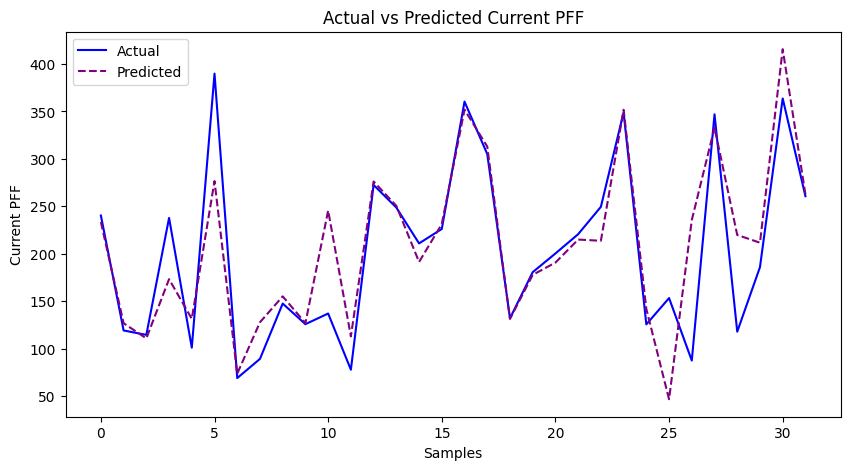

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1712.4347 - val_loss: 7536.7471
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2776.1953 - val_loss: 6979.9790
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1672.5536 - val_loss: 7441.6030
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2523.4619 - val_loss: 8282.1494
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1739.3883 - val_loss: 7751.8057
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1607.8870 - val_loss: 6831.4561
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1651.8147 - val_loss: 7200.5356
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1673.0773 - val_loss: 6848.4409
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 1375.9470 - val_loss: 6195.9956
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2164.0847 - val_loss: 6844.9326
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1301.8025 - val_loss: 7013.2476
Epoch 12/100
3/3 ━

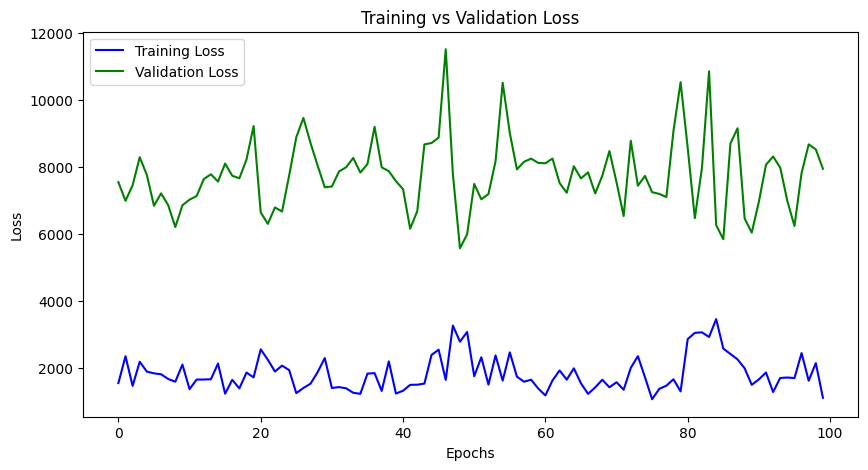

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
R² Score: 0.6820


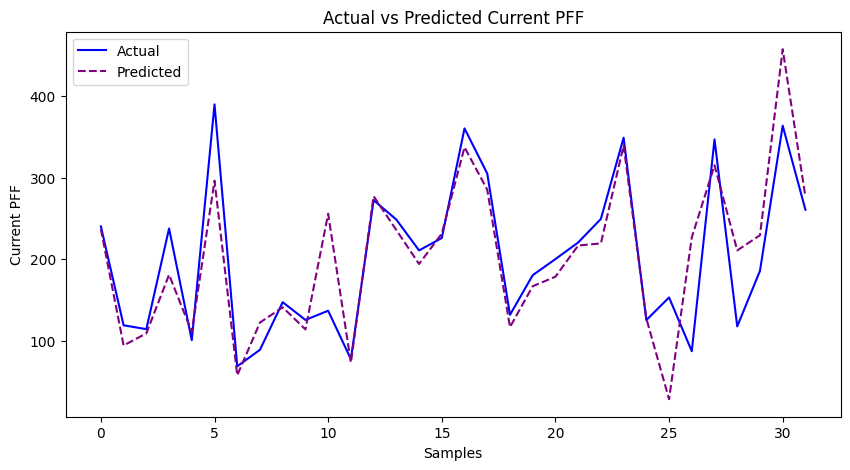

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1575.4612 - val_loss: 8017.8491
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2364.0266 - val_loss: 7798.6274
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1661.3278 - val_loss: 9090.6797
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2446.8103 - val_loss: 9762.7676
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1062.1093 - val_loss: 8707.5615
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2327.7034 - val_loss: 9527.5137
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1273.9877 - val_loss: 8457.2217
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2028.2676 - val_loss: 6820.0669
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2694.6953 - val_loss: 7558.1328
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1229.4392 - val_loss: 8038.9849
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 857.6140 - val_loss: 8218.3037
Epoch 12/250
3/3 ━━

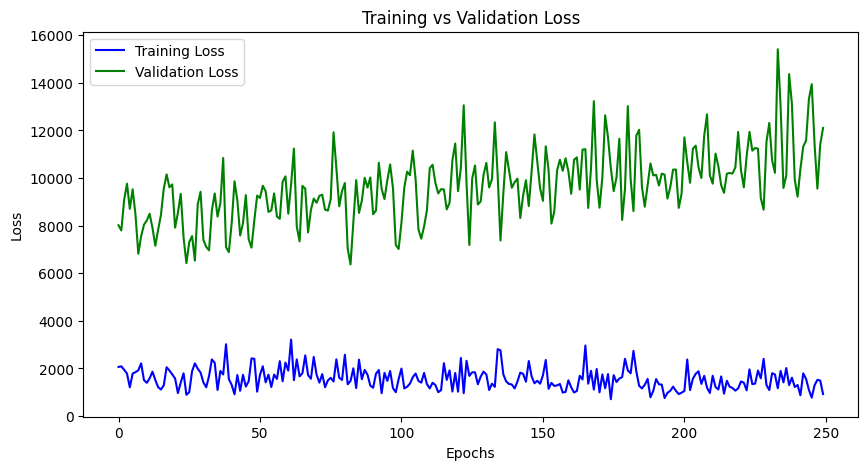

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
R² Score: 0.6059


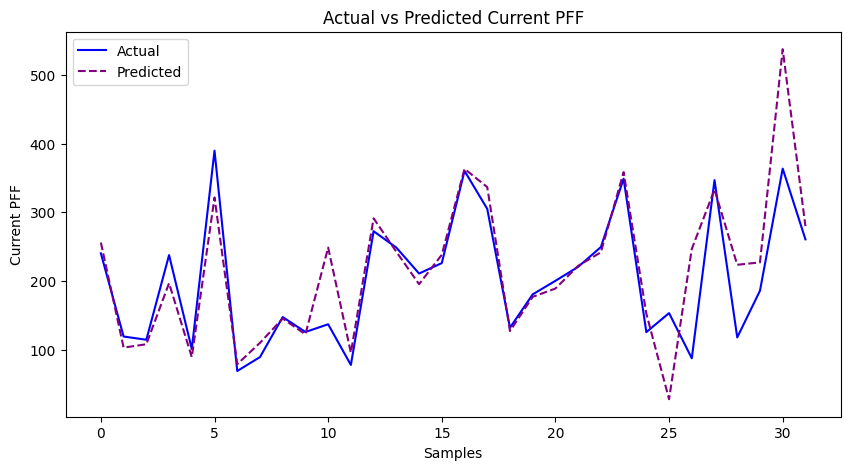

In [45]:
#Training the Model using RNN
epoch_list = [5,10,15,20,25,30,50,100,250]
for e in epoch_list:
    history = model.fit(S, t, epochs=e, batch_size = 9, validation_split=0.2)
    # Plot training & validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.plot(history.history['val_loss'], label='Validation Loss', color='green')
    plt.title('Training vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    #Making predictions on the test set
    t_pred = model.predict(S)
    from sklearn.metrics import r2_score
    
    #Calculating R² score
    r2 = r2_score(t, t_pred)
    
    # Print R² score
    print(f"R² Score: {r2:.4f}")
    # Plot actual vs predicted values
    plt.figure(figsize=(10, 5))
    plt.plot(t, label='Actual', color='blue')
    plt.plot(t_pred, label='Predicted', color='purple', linestyle='dashed')
    plt.title('Actual vs Predicted Current PFF')
    plt.xlabel('Samples')
    plt.ylabel('Current PFF')
    plt.legend()
    plt.show()